<h1> Data Science Specialisatie opdracht </h1>
Opdracht gemaakt voor het vak Data Science in 2017. Docent Martijn Jansen bij de Hogeschool Utrecht.
We gaan onderzoek doen naar de meest bepalende factor van de verkoopprijs van een huis. We hebben verschillende kenmerken, garage of kelder bijvoorbeeld, onderzocht en dan de relatie met de verkoopprijs bepaalt. Daarnaast is hier een linearie regressie in bepaald en aangetoond door middel van verschillende grafieken.

#### Wat is de grootste factor in het bepalen van de ideale salesprice van de onderzochte datasets?

Inhoud van deze notebook:
1. Importeren Data
2. Group Data
3. Onderzoek - Statistieken
4. De Salesprice en haar kenmerken
5. De Auto's en een salesprice
6. Visualisatie per Zone
7. Alle kenmerken tegenover elkaar
8. Linearie Regressie
9. Beoordelingscriteria
10. Conclusie onderzoek



# Importeren Data

## Import House Prices 

Imports used in Analysis and Calculations

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline

from bokeh. io import output_notebook, show
from bokeh. layouts import row, gridplot, widgetbox
from bokeh. charts import Histogram, BoxPlot, Scatter, Line, Bar
from bokeh. plotting import figure, ColumnDataSource
from bokeh. models import CustomJS, Slider

output_notebook()

Loading BokehJS ...

## Loading test and training set

In [13]:
testset = pd.read_csv('test.csv')
trainset = pd.read_csv('train.csv')

testing if the data is loaded in correctly:

In [14]:
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Loading sample submission dataset

In [15]:
samplesub = pd.read_csv('sample_submission.csv')

#Showing imported data
samplesub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Grouping data

In [16]:
# TODO Groepeer data zoals: YrSold SaleType SaleCondition en SalePrice IVM onze hypothese dan...
trainset['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<h1>Onderzoek</h1>
We starten nu met ons onderzoek. We gaan de volgende vraag beantwoorden:

#### Wat is de grootste factor in het bepalen van de ideale salesprice van de onderzochte datasets?
We gaan dit aan de hand van verschillende handelingen doen. Eerst gaan we wat statistieken bekijken van de data-set om een algemeen beeld te krijgen van hoe de set er uit ziet.

## Statistics

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


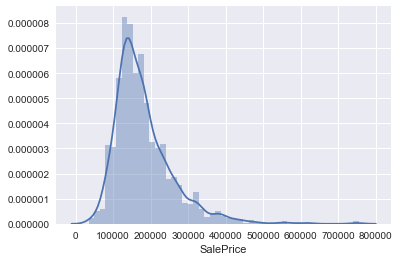

In [17]:
# Use statistics that help us to find an conclusion
sns.distplot(trainset['SalePrice'])

We zien in het bovenstaande histogram dat er een duidelijke groei is bij een bapaalde SalePrice, maar is dit al direct ons antwoord op de hoofdvraag? Of zijn er nog andere kenmerken die ermee te maken hebben?

<h2> Op zoek naar kenmerken</h2>

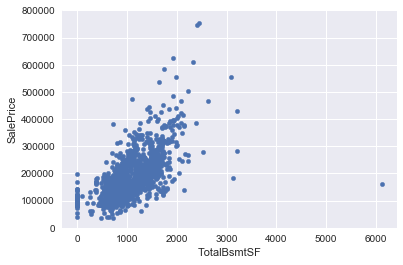

In [18]:
data = pd.concat([trainset['SalePrice'], trainset['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

We zien in de bovenstaande scatterplot een linieare regressie terug, ook zien we dat deze opeens met een enorme snelheid toeneemt!

Deze scatterplot toont aan hoe snel de prijs stijgt als er een grotere kelder in een huis is, de lineaire regressie van deze scatterplot wordt getoond in het hoofdstuk 'Machine Learning'.

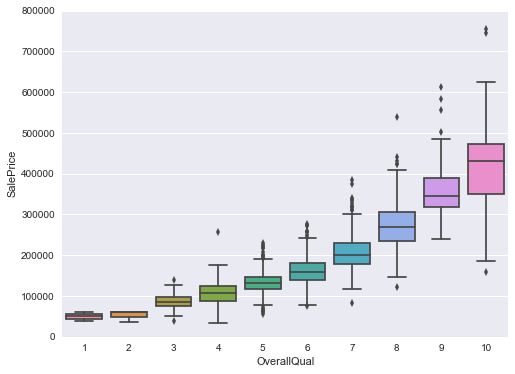

In [19]:
# En wat heeft de prijs voor relatie met de kwaliteit van het huis?
var = 'OverallQual'
data = pd.concat([trainset['SalePrice'], trainset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

We zien hier duidelijk dat op het moment dat de kwaliteit van een huis beter wordt, dat de gemiddeldes een bepaalde groei meemaken. Wat ook heel opvallend is is dat er bij de groei van de kwaliteit ook de minimale en maximale waarden enorm verschillen. Ook groeit per hogere kwaliteit de boxplot.

Ook opmerkelijk is dat er meer outliers zijn naar boven dan naar beneden, dus zegt dat wat over de prijs kwaliteits verhouding, of over de makelaars die het huis verkopen?

<h2> De SalesPrice </h2>

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


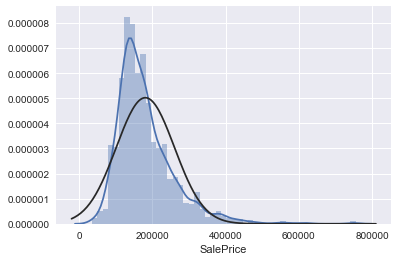

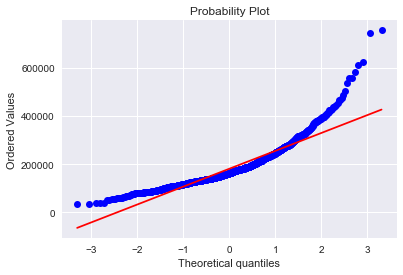

In [20]:
sns.distplot(trainset['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(trainset['SalePrice'], plot=plt)

Wat merken we op aan salesprice? 

Als je goed kijkt naar de twee gemaakte plots merk je op dat SalePrice een duidelijke groei heeft en ook heel duidelijk stagneert. Ook zijn er redelijk weinig outliers hierdoor zijn de gegevens duidelijk en kunnen ze wijzen op een verband binnen SalePrice.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


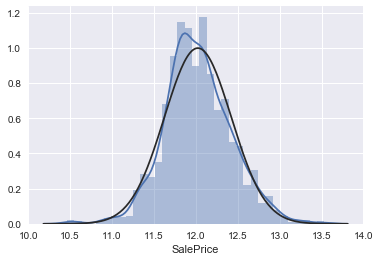

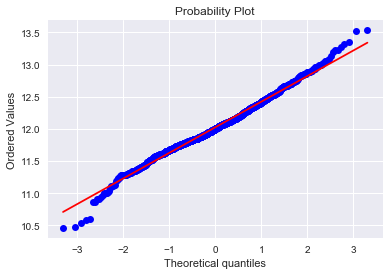

In [21]:
trainset['SalePrice'] = np.log(trainset['SalePrice'])

sns.distplot(trainset['SalePrice'], fit=norm);
figure = plt.figure()
result = stats.probplot(trainset['SalePrice'], plot=plt)

En dan de laatste vraag? 

Zit er een normale verdeling in SalePrice? 

De diagrammen spreken voor zich!

<h2> Auto's en salesprice</h2>

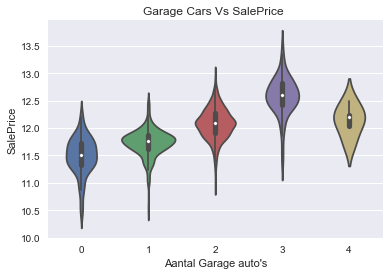

In [22]:
sns.violinplot(trainset["GarageCars"],trainset["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Aantal Garage auto's");

En dan nu wat leuks!

Zit er een verband tussen het aantal autos en de SalePrice?

In deze 'ViolinPlot' zie je dat er werkelijk iets uit deze plot te maken is. 

Zo zie je namelijk dat mensen die geen of 1 auto hebben veruit het minste betalen voor een huis, maar gezinnen met 1 auto hebben wel een duidelijk gemiddelde rond 11.5 bij SalePrice. 

Gezinnen met 3 auto's geven ook veruit het meeste uit aan huizen, en mensen met 4 auto's blijven stug hangen rond dezelfde prijs, ze wijken daar totaal niet vanaf

<h1> Why did we use these Statistics? </h1>

Waarom gebruiken we deze statistieken?

Zoals je in de bovenstaande voorbeelden ziet ze je dat we hebben gekozen voor verschillende tabellen die duidelijke statistieken laten zien en duidelijke antwoorden hebben op onze hoofdvraag. Ook is er aangetoond dat er bijvoorbeeld een normale deviatie is op SalePrice. Dit is heel erg handig om voor onze conclusie.

In het hoofdstuk 'Visualisatie' laten we zien hoe je het makkelijk visueel kan maken voor mensen zonder een Data Science achtergrond. 

De tabellen en voorbeelden die we hebben laten zien in statistieken houden zich vooral bezig met wiskunde berekeningen, zoals wat is de standaard deviatie? En het kunnen zien van verbanden tussen verschillende histogrammen en scatterplots.

<h2> Visualization </h2>

Hoe ziet het eruit per zone?

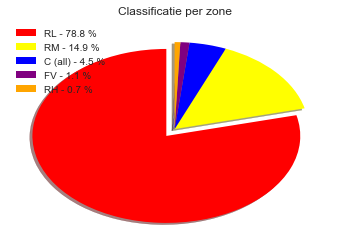

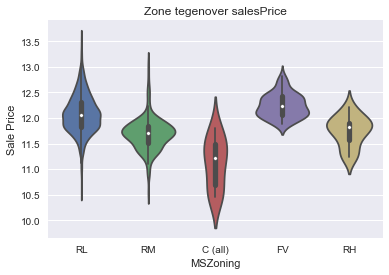

In [23]:
labels = trainset["MSZoning"].unique()
sizes = trainset["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['red', 'yellow', 'blue', 'purple','orange']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Classificatie per zone")
plt.show()

sns.violinplot(trainset.MSZoning,trainset["SalePrice"])
plt.title("Zone tegenover salesPrice")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");

We zien hier duidelijk dat de zone RL veruit de meeste huizen bevat, vervolgens zien we in de violin plot dat RL ook de meest dure huizen bevat, niet veel, maar ze hebben wel het hoogste SalesPrice. 

En hoe zit het met de grootte van leefkamers in vergelijking tot de prijs?

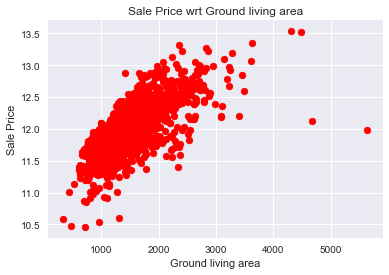

In [13]:
plt.scatter( trainset["GrLivArea"],trainset["SalePrice"],color='red')
plt.title("Sale Price tegenover Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");

Hier zien we heel mooi een verband met de grote van de leefruimte en de prijs! 

Je kan hier heel mooi een lijn doortrekken. Ook zien we een aantal outliers, beide duidelijke outliers zijn aanwezig rond de saleprice van 12.0. Deze worden niet meegenomen in de conclusie.

#### En dan nu het laatste stukje van visualisatie. Hoe zien de relaties tussen alle tabellen eruit, en wat hebben wij hieraan?

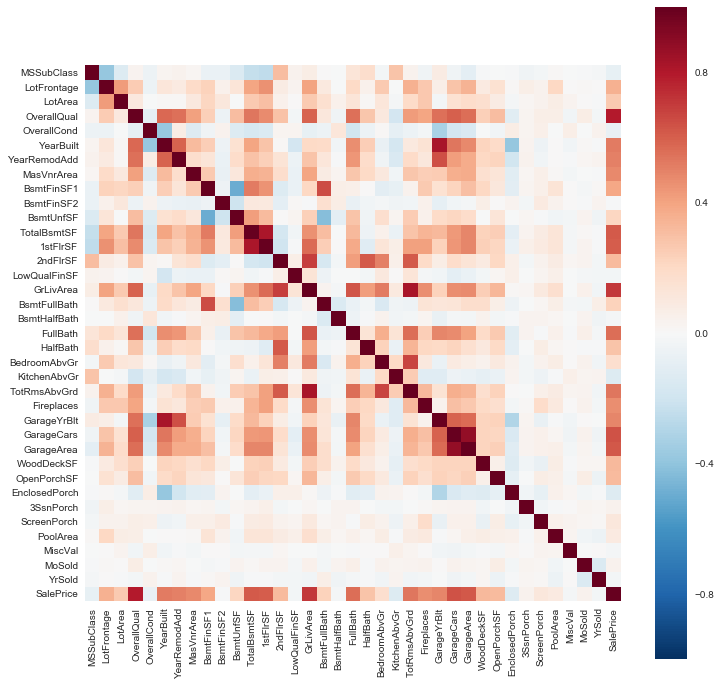

In [6]:
heatmap = trainset.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap, vmax=1, square=True)

Wat hebben wij hieraan? Nou heel simpel hier zie je heel mooi (kleur gecodeert) hoe de relaties tussen de verschillende warden zijn verdeelt. Zo zie je bijvoorbeeld dat de velden 'GarageArea' redelijk donkergekleurd is ten opzicht van SalePrice, hierdoor is de statistiek die wij eerder hebben getoond mooi onderbouwd en heeft het ook redelijk een effect op SalePrice.

Verder is dit een heel mooi diagram om te laten zien om een beeld te krijgen van de grote van de DataSet.

# Machine Learning techniques

De machine learning techniek die we gaan toevoegen is het laten zien van een lineaire regressie bij een scatterplot die we hebben laten zien in een van de vorige hoofdstukken. Namelijk de scatter plot die is getoond om te laten zien hoe de salesprice afhankelijk is van het leefgebied van een huis.

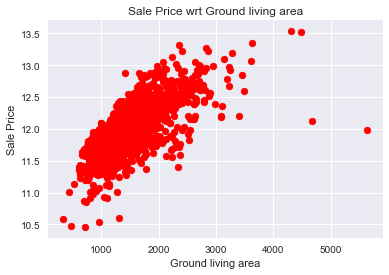

In [15]:
# First Machine learning technique
plt.scatter( trainset["GrLivArea"],trainset["SalePrice"],color='red')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");


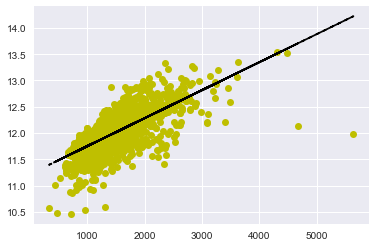

In [16]:
#Linieare Regressie aantonen op gegeven Scatterdiagram
fit = np.polyfit(trainset['GrLivArea'],trainset["SalePrice"],1)
fit_fn = np.poly1d(fit) 

plt.plot(trainset['GrLivArea'],trainset["SalePrice"], 'yo', trainset['GrLivArea'], fit_fn(trainset['GrLivArea']), '--k')

# Why did we use Machine Learning this way?

Dus, waarom hebben wij deze manieren van Machine Learning gebruikt? 

Als eerste wil ik de opmerking maken dat bovenstaande manier niet de enige manier van Machine Learning is die wij hebben toegepast, ook hebben wij verschillende punten lineaire regressie aangetoond. 

Wij hebben vooral lineaire regressie aangetoond omdat het handig was om te zien waar de vebanden liggen in de data die wij hebben aangetoond, en dat het niet losse producten zijn die totaal geen samenhang hebben.

# Conclusion

### Wat is de grootste factor in het bepalen van de ideale salesprice van de onderzochte datasets?

Kunnen wij onze hoofdvraag nu beantwoorden?

In enige zin ja, in alle getoonde voorbeelden zien we dat er veel factoren zijn die SalePrice beïnvloeden, er is geen duidelijke factor waarbij SalePrice enorm toeneemt, ze hebben allemaal een *Lineaire Regressie*, deze hebben wij ook op verschillende punten aaangetoond.

Wel zien we een factor die net iets belangrijker lijkt dan de rest van de getoonde waarden, en dat is de Overall Quality van een huis. (*Zie onderstaand voorbeeld*) Daar zien we dat bij het toenemen van de kwaliteit het gemiddelde toeneemt, ook nemen de min en max value enorme verschillen aan als de kwaliteit van een huis groeit. 

### Maar waarom zien wij Overall Quality direct als belangrijkste waarde? 

Hier hebben wij twee redenen voor, ten eerste zien we dat bij de groei van de kwaliteit ook steeds meer outliers voorkomen, en waarom deze outliers aanwezig zijn is niet duidelijk.

Ook is het niet duidelijk wat de Overall Quality van een huis bepaald, dit wordt door de dataset niet duidelijk gemaakt en is een onderdeel voor discussie binnen het beantwoorden van de hoofdvraag.

Hier moet dus meer onderzoek naat gedaan worden, en dat doen we door meerdere factoren te vergelijken met SalePrice.

### Zijn er andere factoren die duidelijk een verschil in SalePrice aantonen?

Ja! Aan het begin van de specialisatie namen wij aan dat er 1 waarde was die duidelijk aantoonde dat de SalePrice, en dat de andere waarden bijna geen verschil zouden maken, maar toch zien we telkens exponentiele groeien plaatsvinden bij waarden waar je het niet direct verwacht, maar ook bij waarden waar je het heel makkelijk zou kunnen verwachten.

#### Onverwachte factoren

Hoeveelheid garages: Dit was leuk om te zien, aangezien je niet snel denkt aan een huis met vier garages (wat praktisch onhandig is) merk je wel dat het voor de SalePrice enig verschil maakt. Ook kan je in de gemaakte Violin Plot zien dat de meeste huizen 1 garage hebben, aangezien de 'Violin' daar een stuk breder is dan bij de andere waarden, en ook zie je dat aan de lengte van de Violin.

Grootte kelder: Dit kan zowel een onverwachte als een verwachte factor zijn. Maar aangezien de groei (enorm) toeneemt behoord deze toch wel tot een van de onverwachte factoren. Voor de enorme groei verwijs ik naar 1 van de bovenstaande voorbeelden.

#### Verwachte factoren

Buurt: Vaak verwacht je dat factoren zoals de soort buurt enorme verschillen kunnen opleveren. En ook dat is van toepassing tot dit voorbeeld. Waarom deze factor toeneemt is niet duidelijk, aangezien wij de buurten niet kennen en dar geen uitspraak over kunnen doen. Maar wel kunnen we zeggen dat het geen verassing is dat er een 'superieure' buurt is waar de huizen duurder zijn dan in de andere buurten.

Kwaliteit: Dit hebben wij in de vorige subparagraaf al uitgelegd. Dit is onnodig om nogmaals te herhalen.

Grootte van het leefgebied: Dit was een van de meest voorspelbare factoren, aangezien het 


## Uiteindelijke conclusie

Het antwoord voor ons onderzoek is het volgende: 

Er zijn enorm veel factoren waar je deze conclusie op kan baseren, na enig onderzoek naar de verschillende waarden binnen de dataset kwam er geen overduidelijke factor uitspringen die heel snel aangaf dat deze de SalePrice enorm beïnvloedde, maar na de meeste waarden te hebben vergeleken, kwamen wij erop uit dat één van de belangrijkste factoren van de SalePrice van een huis OverallQuality is. 

Dit baseren wij op het feit dat daar de groei het meeste toeneemt. Ook baseren wij het op het feit dat verschillende andere gemeten factoren waarschijnlijk toebehoren tot 'Overall Quality' factoren zoals grootte van het huis en ligging van de buurt.

Dus volgens ons is 'Overall Quality' de belangrijkste factor in het bepalen en voorspellen van de SalePrice.


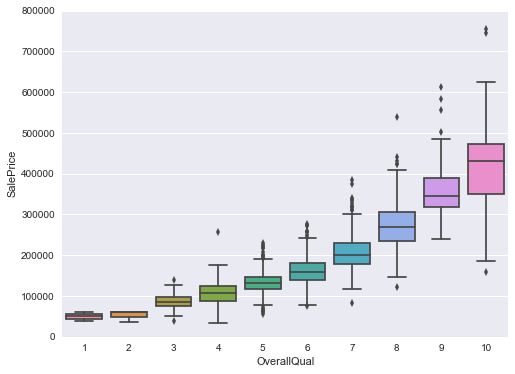

In [4]:
#De hoofdfactor
var = 'OverallQual'
data = pd.concat([trainset['SalePrice'], trainset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);